In [142]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import yfinance as yf
from pmdarima import auto_arima

# SARIMAX predictions

In [143]:
import yfinance as yf
import pandas as pd
import numpy as np

from pmdarima.arima import auto_arima

def sarimax_predictions(asset, start_date, end_date):
    data = yf.download(asset, start=start_date, end=end_date)
    print("Downloaded data shape:", data.shape)  # Add this line
    if data.empty:
        print("Data for the specified date range is empty.")
        return None
    data['Closee'] = (data['High']+data['Low']+data['Close'])/3
    data['RSI'] = ta.rsi(data.Close, length=15)  # RSI (relative strength index)
    data['EMAF'] = ta.ema(data.Close, length=20)  # fast moving avg
    data['EMAM'] = ta.ema(data.Close, length=100)  # medium moving avg
    data['EMAS'] = ta.ema(data.Close, length=150)  # slow moving avg
    data['vwap'] = (data.Volume * data.Closee).cumsum() / data.Volume.cumsum()
    data['target'] = data['Close'].shift(-1)  # C(t) = C(t-1) + diff(t)
    data.dropna(inplace=True)
    data.reset_index(inplace=True)
    data = data.drop(['Volume', 'Close', 'Date', 'Adj Close','Closee'], axis=1)
    
    # check for enough samples
    if len(data) < 62:  
        print("need more data")
        return None
    
    # SARIMAX
    X_SARIMAX = data.drop(['target'], axis=1)
    y_SARIMAX = data['target']
    train_y = y_SARIMAX.iloc[:-31]
    test_y = y_SARIMAX.iloc[-31:]
    train_X = X_SARIMAX.iloc[:-31]
    test_X = X_SARIMAX.iloc[-31:]
    
    model_SARIMAX = auto_arima(y=train_y, X=train_X, seasonal=True, m=7)
    predictions_SARIMAX = pd.Series(model_SARIMAX.predict(n_periods=31, X=test_X))
    
    predictions_SARIMAX.index = test_y.index
    df_cp = pd.DataFrame(predictions_SARIMAX, columns=[asset])
    
    return df_cp



In [144]:
#sarimax_predictions('BTC-USD', '2023-03-31','2024-03-31')

In [145]:
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
#cryptocurrencies = ['BTC-USD', 'ETH-USD','SOL-USD','USDT-USD','USDC-USD']
def extractor(alg, start_date, end_date):
    results = []
    for crypto in cryptocurrencies:
        result = alg(crypto, start_date, end_date)
        results.append(result)
    df_crypto = pd.concat(results, axis=1) 
    return df_crypto

#extractor(sarimax_predictions, '2023-03-31', '2024-03-31')


In [146]:
dfn= extractor(sarimax_predictions, '2023-03-31', '2024-04-30');print(dfn)
#'2023-01-31', '2024-02-29'#feb
#'2023-03-31', '2024-03-31'#march
#'2023-03-31', '2024-04-30' #aprl

[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ashok\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ashok\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))
[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ashok\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ashok\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))
[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)


C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
[*********************100%%**********************]  1 of 1 completed


Downloaded data shape: (396, 6)
        BNB-USD       BTC-USD      ETH-USD   XRP-USD     SOL-USD   AVAX-USD  \
215  608.093971  70151.964212  3516.398652  0.626575  193.682249  53.535973   
216  621.166186  70536.360528  3525.919422  0.623711  199.107967  53.886005   
217  612.717451  71523.855758  3629.812144  0.625697  203.606522  53.821770   
218  586.205215  70028.034163  3543.330828  0.617508  204.464585  53.249053   
219  589.332850  67393.884473  3395.170799  0.602746  196.702750  50.702076   
220  582.263747  67182.409993  3353.283202  0.592109  197.294877  48.394491   
221  603.193651  68920.133355  3421.134250  0.598445  195.762697  48.332198   
222  601.377984  68090.540469  3323.749387  0.595694  191.562303  46.885167   
223  608.381574  69877.021478  3402.847287  0.597516  188.063542  48.792810   
224  617.335412  70774.819486  3470.428542  0.598165  190.020984  49.494920   
225  608.116066  72463.836955  3714.498731  0.609223  191.747214  50.477983   
226  610.113284  704

C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ashok\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


# Dataframe with Parameters

In [147]:
from pypfopt.expected_returns import mean_historical_return
Mu = mean_historical_return(dfn)/12
from pypfopt.risk_models import CovarianceShrinkage
S = CovarianceShrinkage(dfn).ledoit_wolf()

In [148]:
#print(Mu)
#print(S**0.5)


In [149]:
df = pd.DataFrame(S**0.5, index=cryptocurrencies)
diagonals = np.diag(df.values)
df1 = pd.DataFrame(diagonals, index=cryptocurrencies, columns=['STD_Dev'])
df1['returns'] = pd.DataFrame(Mu,columns=['returns'])
df1['SR']=((df1['returns']-0.07)/df1['STD_Dev'])
df1=df1.reset_index();df1


,index,STD_Dev,returns,SR
0,BNB-USD,0.349000,0.074017,0.011511
1,BTC-USD,0.351058,-0.034389,-0.297355
2,ETH-USD,0.442365,-0.018415,-0.199870
3,XRP-USD,0.337565,-0.065574,-0.401624
4,SOL-USD,0.410115,-0.074979,-0.353509
5,AVAX-USD,0.531431,-0.080769,-0.283703
6,USDT-USD,0.196917,-0.000168,-0.356334
7,USDC-USD,0.196899,0.000076,-0.355126
8,SHIB-USD,0.678007,-0.063987,-0.197618
9,DOGE-USD,0.774941,-0.077474,-0.190303


# Recommender

In [150]:
#using min-max scaler scale the data
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_ni = df1.drop('index',axis =1);df_ni

dfs = pd.DataFrame(scaler.fit_transform(df_ni), columns=df_ni.columns);#dfs


In [151]:
dist = pdist(dfs, metric='euclidean')

#simalirity kxk matrix
simmax = squareform(dist)


#print("Standardized DataFrame:")
#print(dfs)
#print("\nsimilarity Matrix (based on Euclidean distance):")
#print(simmax)
print(simmax.shape)

(10, 10)


In [152]:
df1 = df1.rename(columns={'index':'product'})
product_name = df1['product']
product_name.shape
indices = pd.Series(df1.index, index=df1['product'])

In [153]:
def recommend(product):
    idx = indices[product]
    sim_scores = list(enumerate(simmax[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=False)
    sim_scores = sim_scores[1:31]
    product_indices = [i[0] for i in sim_scores]
    return product_name.iloc[product_indices]

In [154]:
df1

,product,STD_Dev,returns,SR
0,BNB-USD,0.349000,0.074017,0.011511
1,BTC-USD,0.351058,-0.034389,-0.297355
2,ETH-USD,0.442365,-0.018415,-0.199870
3,XRP-USD,0.337565,-0.065574,-0.401624
4,SOL-USD,0.410115,-0.074979,-0.353509
5,AVAX-USD,0.531431,-0.080769,-0.283703
6,USDT-USD,0.196917,-0.000168,-0.356334
7,USDC-USD,0.196899,0.000076,-0.355126
8,SHIB-USD,0.678007,-0.063987,-0.197618
9,DOGE-USD,0.774941,-0.077474,-0.190303


In [155]:
max_sr_index = df1['SR'].idxmax()  
product_value = df1.loc[max_sr_index, 'product']  
print(product_value)

BNB-USD


In [156]:
recommend('ETH-USD').head(6)

1     BTC-USD
5    AVAX-USD
8    SHIB-USD
4     SOL-USD
7    USDC-USD
6    USDT-USD
Name: product, dtype: object

# Scalper and trend and plots

# a) Actuals

def scalp(asset,start_date,end_date):
    df=yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close, length=14) 
    
    #declare signals
    df['action'] = 'hold'  
    sell_constraint = (df['Close'] > df['VWAP']) & (df['RSI'] > 70)#57
    buy_constraint = (df['Close'] < df['VWAP']) & (df['RSI'] < 30)#48
    df.loc[sell_constraint, 'action'] = 'sell'
    df.loc[buy_constraint, 'action'] = 'buy'
    
    initial_wealth=100000
    df['payoff'] = 0 #start payoff =0
    df.loc[df['action'] == 'buy', 'payoff'] = -df['Close'] #buy the asset(-close)
    df.loc[df['action'] == 'sell', 'payoff'] = df['Close'] #sell the asset(+close/ short is allowed)
    
    #find cummulative payoff
    df['cumulative_payoff'] = df['payoff'].cumsum()
    wealth =100000 #but yoy can say initial wealth is $100,000
    df['returns'] = (wealth + df['cumulative_payoff']) / initial_wealth
 
    #return #df['returns'].mean() df[]
    return df['returns'].iloc[-1],asset
    


    
    
    

In [157]:
#this trend is for actual data.
def trend(asset,start_date,end_date):
    df = yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close,length=14) 
    df['9_ema']=ta.ema(df.Close,lenght=9)
    
    up = (df['Close'] > df['9_ema'])
    down = (df['Close'] < df['9_ema']) 
    df.loc[up, 'trend'] = 1
    df.loc[down, 'trend'] = 0
    direction= df.trend.sum()
    dirr=[]
    if direction>=11:
        dirr.append('upward trend')
    else:
        dirr.append('downward trend')
    return dirr,asset,direction

In [158]:
import matplotlib.pyplot as plt
def plots(asset,start_date,end_date):
    df = yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close,length=14) 
    df['9_ema']=ta.ema(df.Close,lenght=9)
    return plt.title(asset),df.Close.plot(color='red',grid = True, figsize=(10,8),legend=True),df.VWAP.plot(figsize=(10,8),grid = True,legend=True),df['9_ema'].plot(color='green',grid = True, figsize=(10,8),legend=True)

def plotss(asset):
    df['9_ema']=ta.ema(dfn.asset,lenght=9)
    return plt.title(asset),dfn.asset.plot(color='red',grid = True, figsize=(10,8),legend=True),df['9_ema'].plot(color='green',grid = True, figsize=(10,8),legend=True)


In [159]:
#this trend is for actual data.
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
#cryptocurrencies = ['BTC-USD', 'ETH-USD','SOL-USD','USDT-USD','USDC-USD']
for j in cryptocurrencies:
    m = trend(j, '2024-04-01', '2024-04-30')
    print(m)
    
#[ 'BTC-USD', 'ETH-USD','SOL-USD','USDT-USD','USDC-USD']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(['upward trend'], 'BNB-USD', 12.0)
(['downward trend'], 'BTC-USD', 6.0)
(['downward trend'], 'ETH-USD', 8.0)
(['downward trend'], 'XRP-USD', 6.0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


(['downward trend'], 'SOL-USD', 3.0)
(['downward trend'], 'AVAX-USD', 3.0)
(['downward trend'], 'USDT-USD', 6.0)
(['downward trend'], 'USDC-USD', 7.0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(['downward trend'], 'SHIB-USD', 8.0)
(['downward trend'], 'DOGE-USD', 2.0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


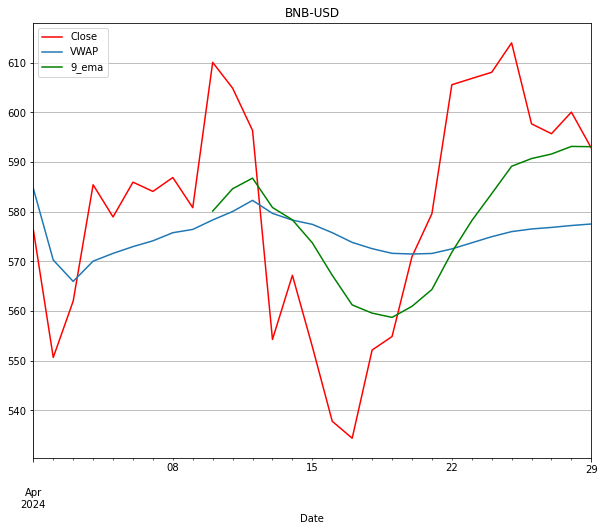

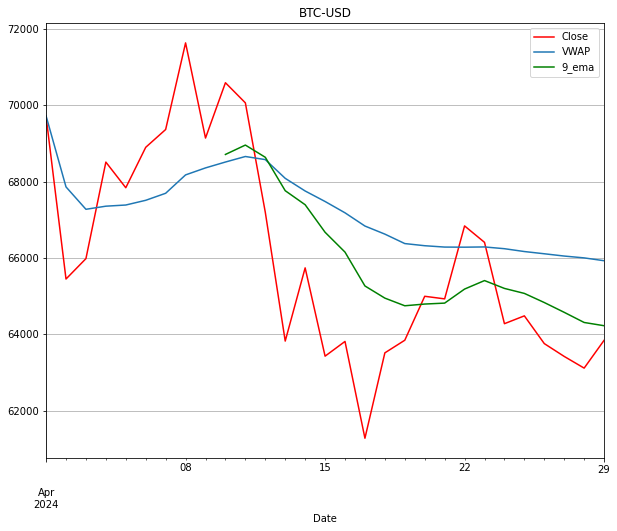

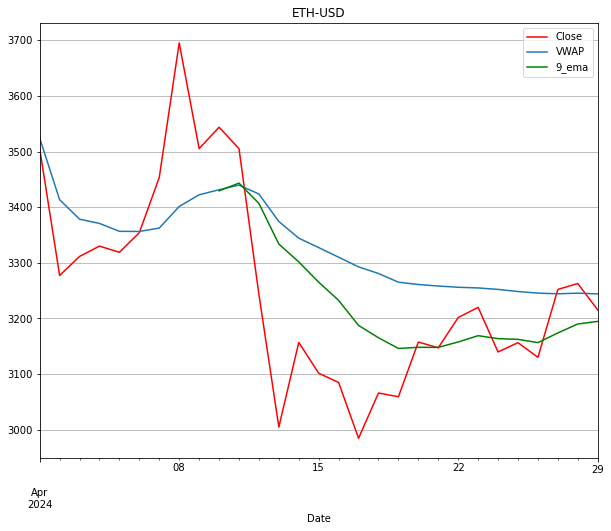

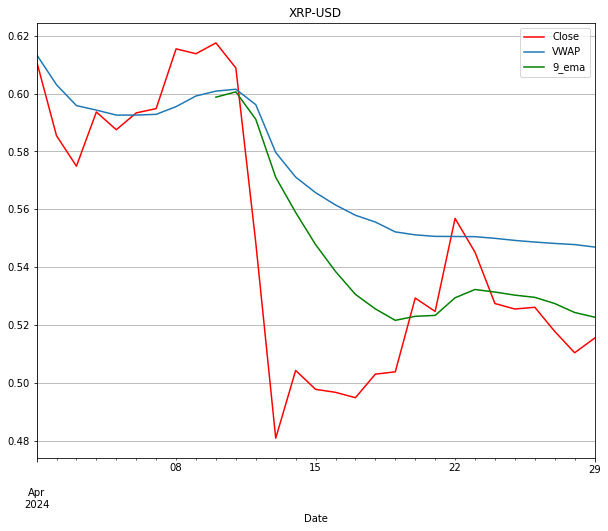

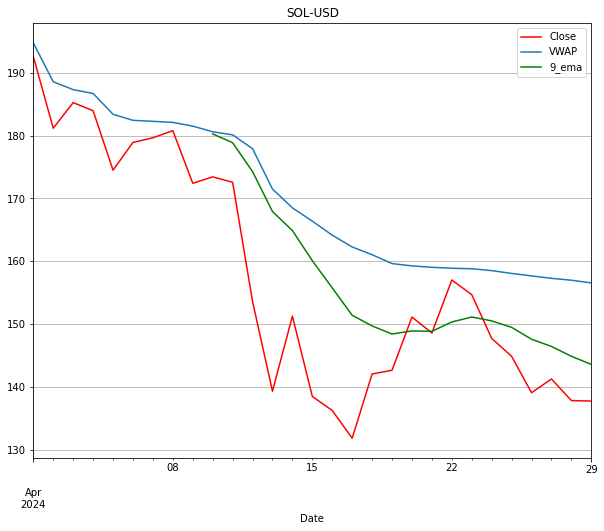

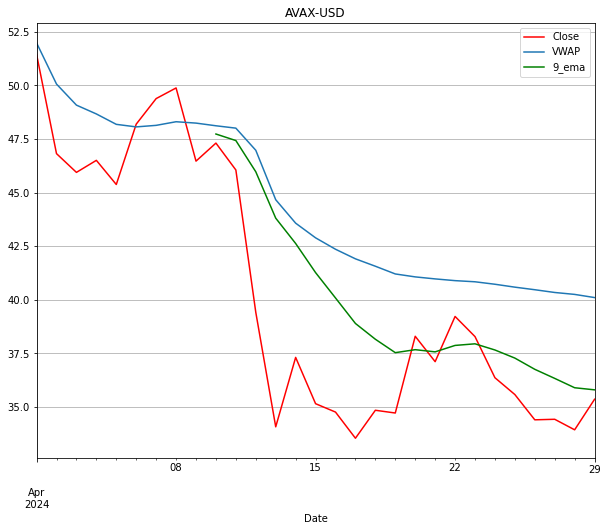

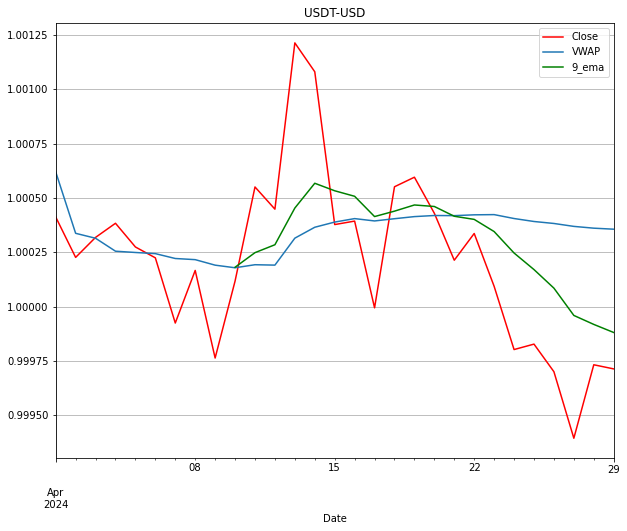

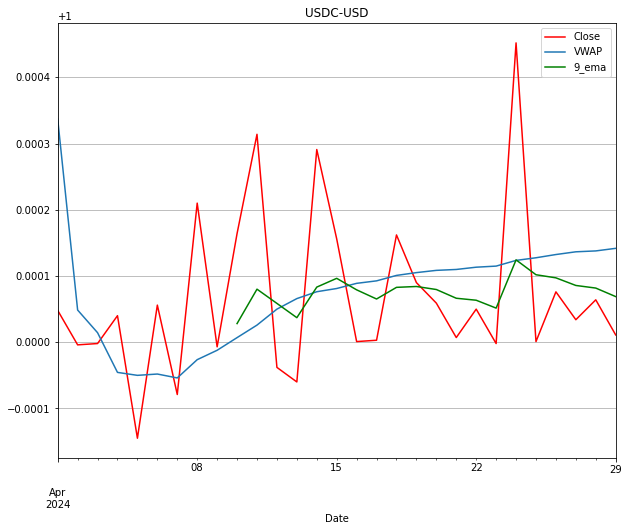

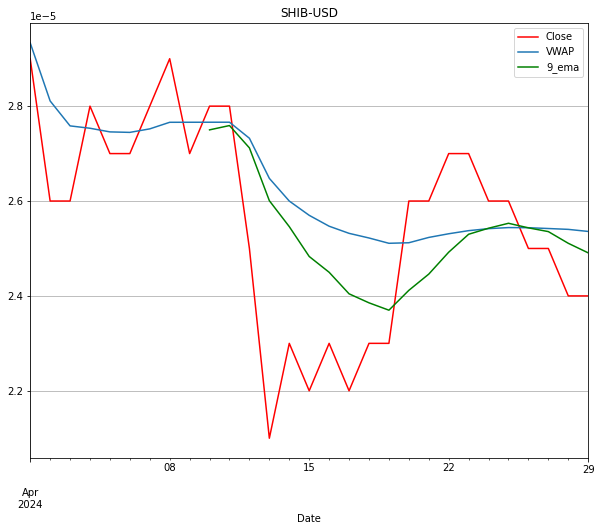

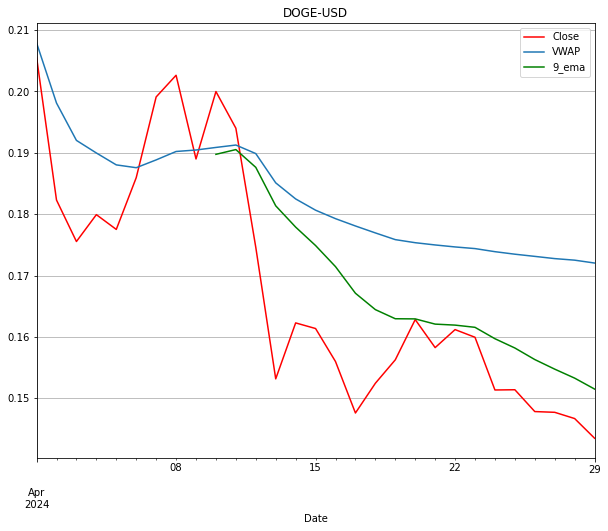

In [160]:
#actual trend plots
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
for i in cryptocurrencies:
    plt.figure(figsize=(13, 10))
    r = plots(i, '2024-04-01', '2024-04-30')

# b) Predictions

In [164]:
#this trend is predicted

for k in dfn.columns[:-1]:
    up=(dfn[k]>ta.ema(dfn[k],length=9))
    down=(dfn[k]<ta.ema(dfn[k],length=9))
    dfn.loc[up,'trend']=1
    dfn.loc[down,'trend']=0
    directionn= dfn.trend.sum()
    dirn=[]
    if directionn>11:
        dirn.append('upward trend')
    else:
        dirn.append('downward trend')
    print( dirn,k,directionn)

['upward trend'] BNB-USD 16.0
['downward trend'] BTC-USD 11.0
['downward trend'] ETH-USD 11.0
['downward trend'] XRP-USD 6.0
['downward trend'] SOL-USD 0.0
['downward trend'] AVAX-USD 2.0
['downward trend'] USDT-USD 8.0
['upward trend'] USDC-USD 16.0
['downward trend'] SHIB-USD 8.0
['downward trend'] DOGE-USD 7.0


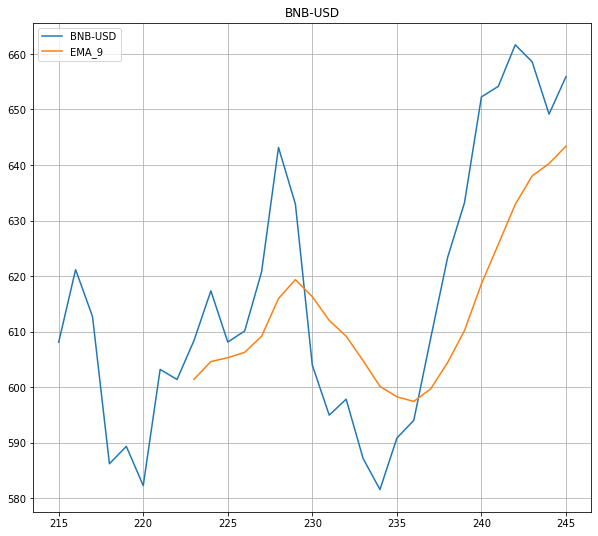

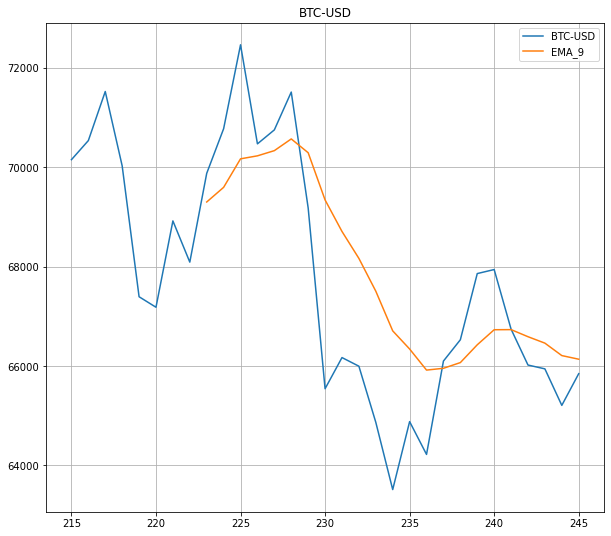

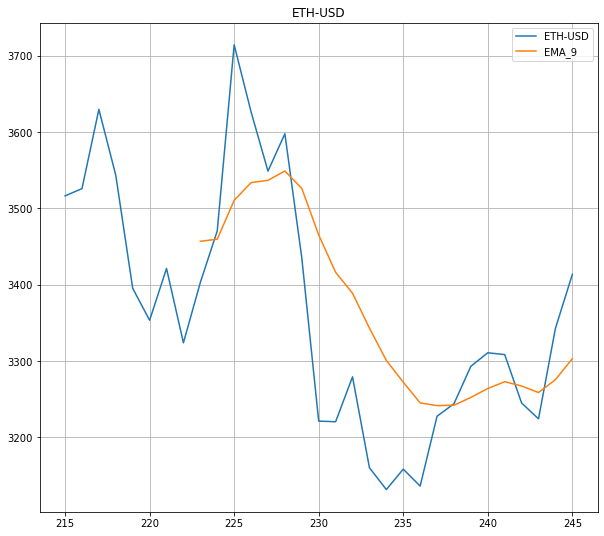

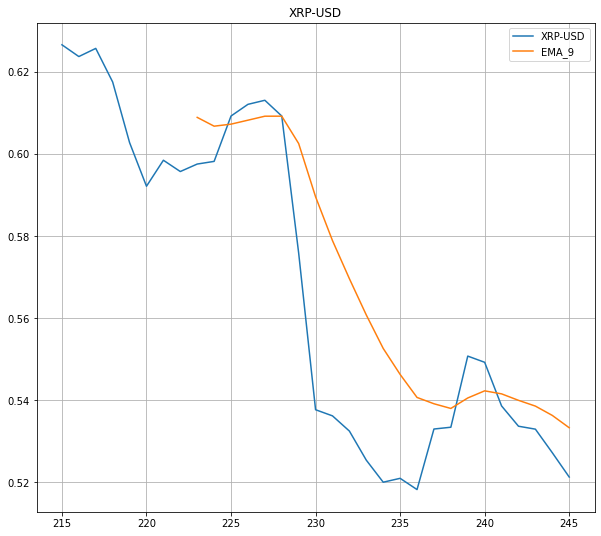

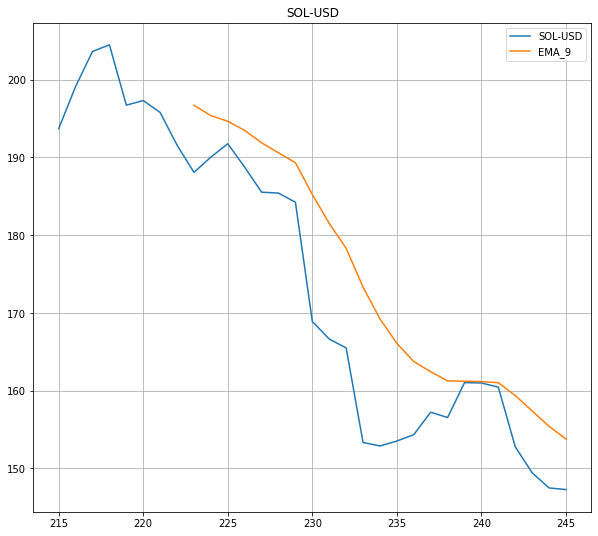

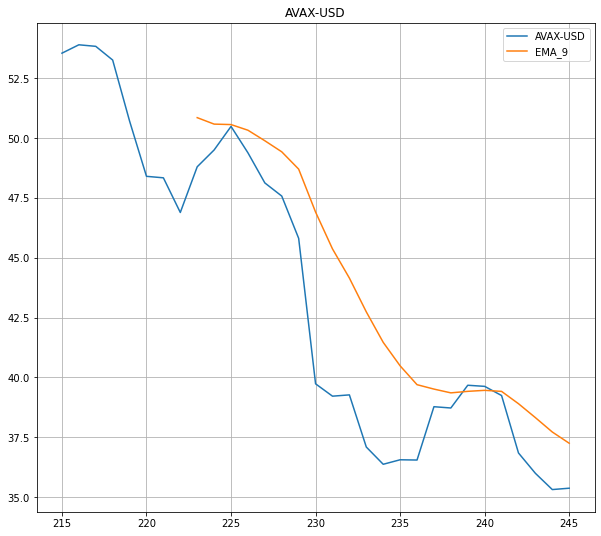

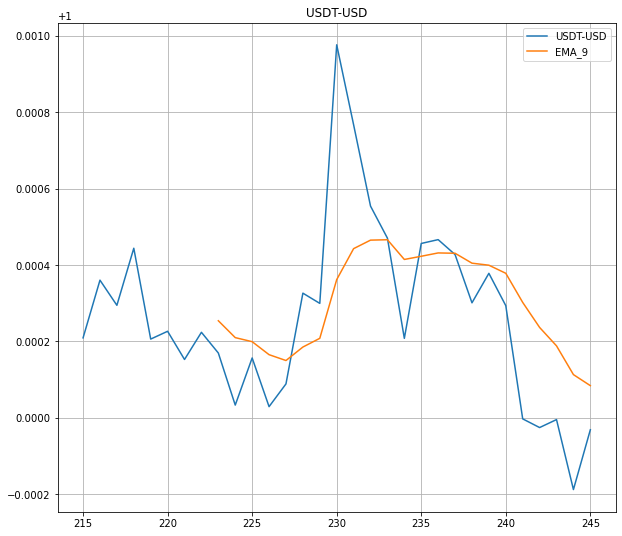

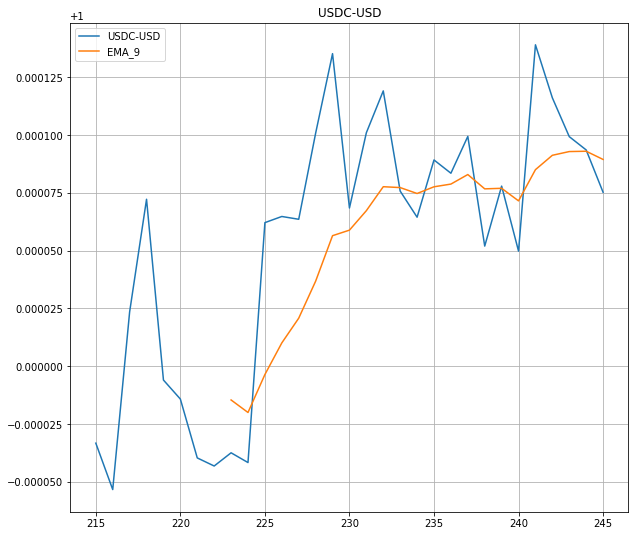

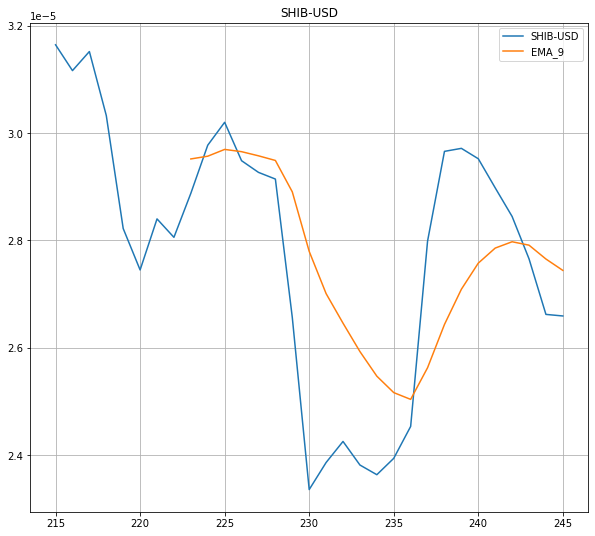

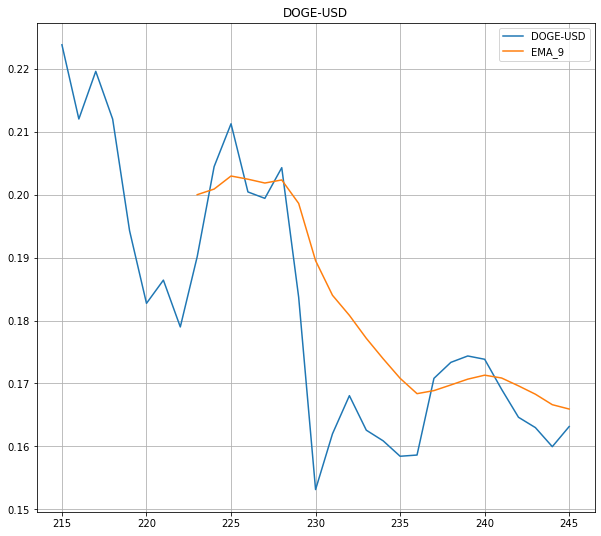

In [165]:
#plots for the predictions
for k in dfn.columns[:-1]:
    plt.figure(figsize=(10, 9))
    plt.title(k)
    dfn[k].plot(grid=True,legend=True)
    ema =ta.ema(dfn[k],length=9);ema.plot(grid=True,legend=True)
    plt.show()

# Back Test with Scalper

In [166]:
def scalp(asset,start_date,end_date):
    df=yf.download(asset, start=start_date,end=end_date)
    df['Closee'] = (df['High']+df['Low']+df['Close'])/3
    df["VWAP"]=(df.Volume*df.Closee).cumsum()/df.Volume.cumsum()
    df['RSI'] = ta.rsi(df.Close, length=14) 
    df['9_ema']=ta.ema(df.Close,lenght=9)
    
    
    #declare signals
    df['action'] = 'hold'  
    sell_constraint = (df['Close'] > df['VWAP']) & (df['RSI'] > 70)#57
    buy_constraint = (df['Close'] < df['VWAP']) & (df['RSI'] < 30)#48
    df.loc[sell_constraint, 'action'] = 'sell'
    df.loc[buy_constraint, 'action'] = 'buy'
    
    #detect trend
    up = (df['Close'] > df['9_ema'])
    down = (df['Close'] < df['9_ema']) 
    df.loc[up, 'trend'] = 1
    df.loc[down, 'trend'] = 0
    direction= df.trend.sum()
    trendd=[]
    if direction>=11:
        trendd.append('upward_trend')
    else:
        trendd.append('downward_trend')
        
        
    #rules
    initial_wealth = 100000
    for trend in trendd:
        if trend=='upward_trend':
            initial_asset_units = round(initial_wealth/df['Close'].iloc[0])
            initial_wealth = initial_wealth-df['Close'].iloc[0]*initial_asset_units
        elif trend=='downward_trend':
            #initial_asset_units= 1
            initial_asset_units=  -round(initial_wealth/df['Close'].iloc[0])#interchange for short 
            initial_wealth = initial_wealth-df['Close'].iloc[0]*initial_asset_units

    exp_price = round(df.median())
    df['payoff'] = 0
    df['position'] = 0
    wealth = initial_wealth
    asset_units = initial_asset_units
    
    for index, row in df.iterrows():
        if row['action'] == 'buy' and row['Close'] <= exp_price.iloc[0] and row['Close'] <= wealth:
            df.at[index, 'payoff'] = -row['Close']  # pay for the asset
            df.at[index, 'position'] = 1  # asset held
            wealth =wealth- row['Close']  # reduce wealth
            asset_units = asset_units+1  # increase asset units
            
        elif row['action'] == 'sell' and asset_units > 0 and row['Close'] >= exp_price.iloc[0]: 
            df.at[index, 'payoff'] = row['Close']  # gain money from sale
            df.at[index, 'position'] = 0  # position is 0
            wealth = wealth+row['Close'] #increase wealth
            asset_units = asset_units-1 #reduce assets
    ret = ((wealth+asset_units*df['Close'].iloc[-1])/100000 -1)*100; print('returns from the trade is:',round(ret),'%')
    return ret,'%',asset
    

In [167]:
#df_results=pd.DataFrame()
cryptocurrencies = ['BNB-USD', 'BTC-USD', 'ETH-USD', 'XRP-USD','SOL-USD','AVAX-USD','USDT-USD','USDC-USD','SHIB-USD','DOGE-USD']
for crypto in cryptocurrencies:
   
    result = ((scalp(crypto,'2024-04-01', '2024-04-30')))
    print(result) #in percentage btw
  

[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') 

returns from the trade is: 3 %
(2.8431806640625057, '%', 'BNB-USD')
returns from the trade is: 6 %
(5.861027343750003, '%', 'BTC-USD')
returns from the trade is: 8 %
(8.398431152343754, '%', 'ETH-USD')


[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') 

returns from the trade is: 16 %
(15.676922366350897, '%', 'XRP-USD')
returns from the trade is: 28 %
(28.44329214477539, '%', 'SOL-USD')
returns from the trade is: 31 %
(31.275441463470454, '%', 'AVAX-USD')



C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed


returns from the trade is: 0 %
(0.06986970859765851, '%', 'USDT-USD')
returns from the trade is: 0 %
(0.0037072235345769755, '%', 'USDC-USD')
returns from the trade is: 17 %
(17.24137844444613, '%', 'SHIB-USD')


C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())
[*********************100%%**********************]  1 of 1 completed
C:\Users\ashok\AppData\Local\Temp/ipykernel_10932/3564455671.py:40: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  exp_price = round(df.median())


returns from the trade is: 30 %
(30.197966825485235, '%', 'DOGE-USD')


In [168]:
recommend('DOGE-USD').head(6)

8    SHIB-USD
5    AVAX-USD
2     ETH-USD
4     SOL-USD
1     BTC-USD
3     XRP-USD
Name: product, dtype: object

In [170]:
recommend('BNB-USD').head(6)

2     ETH-USD
1     BTC-USD
7    USDC-USD
6    USDT-USD
8    SHIB-USD
5    AVAX-USD
Name: product, dtype: object

In [169]:
df1

,product,STD_Dev,returns,SR
0,BNB-USD,0.349000,0.074017,0.011511
1,BTC-USD,0.351058,-0.034389,-0.297355
2,ETH-USD,0.442365,-0.018415,-0.199870
3,XRP-USD,0.337565,-0.065574,-0.401624
4,SOL-USD,0.410115,-0.074979,-0.353509
5,AVAX-USD,0.531431,-0.080769,-0.283703
6,USDT-USD,0.196917,-0.000168,-0.356334
7,USDC-USD,0.196899,0.000076,-0.355126
8,SHIB-USD,0.678007,-0.063987,-0.197618
9,DOGE-USD,0.774941,-0.077474,-0.190303


# End

In [38]:
#The 9 EMA strategy generates buy signals when the price moves above the 9 EMA line and sell signals 
#when the price moves below the indicator